In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
df = pd.read_csv('Exam_Score_Prediction.csv')

In [ ]:
df[:5]

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [ ]:
df_dummies = pd.get_dummies(df, columns=['gender','course','internet_access', 'sleep_quality', 'study_method','facility_rating','exam_difficulty']).astype(int)

In [ ]:
df_dummies[:5]

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score,gender_female,gender_male,gender_other,course_b.com,...,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_high,facility_rating_low,facility_rating_medium,exam_difficulty_easy,exam_difficulty_hard,exam_difficulty_moderate
0,1,17,2,92,7,58,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,2,23,3,64,4,54,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
2,3,22,7,76,8,90,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,4,20,0,48,5,29,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
4,5,20,0,71,9,43,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


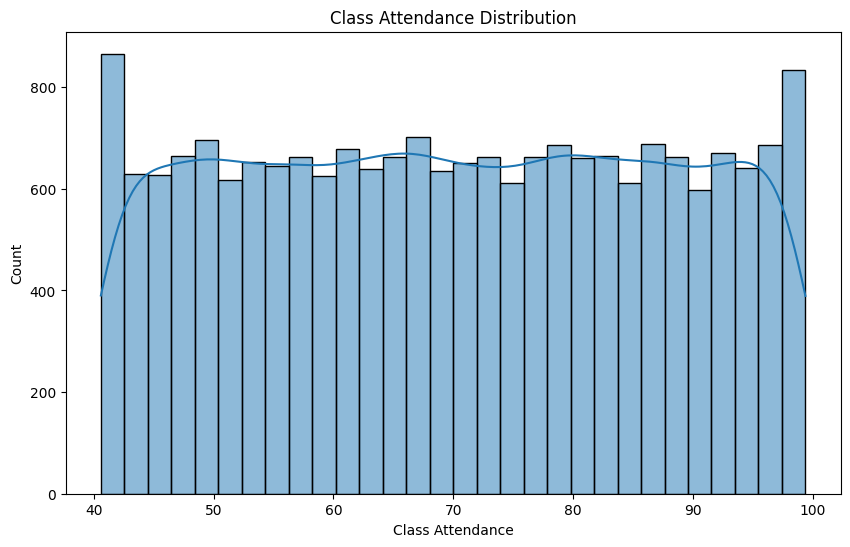

In [ ]:
# EDA

plt.figure(figsize=(10, 6))
sns.histplot(df['class_attendance'], kde = True, bins = 30)
plt.title('Class Attendance Distribution')
plt.xlabel('Class Attendance')
plt.ylabel('Count')
plt.show()

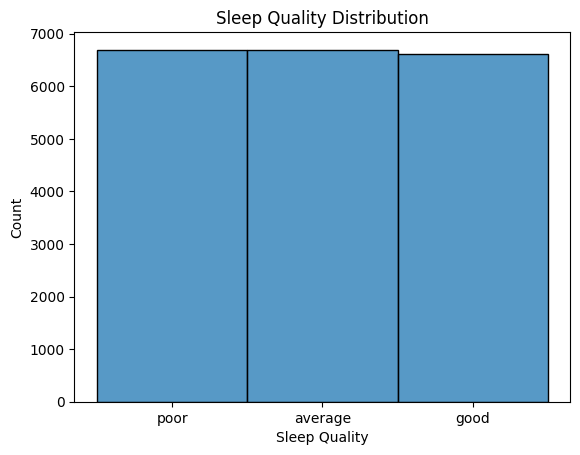

In [ ]:
# Sleep Distribution
# Does not add a whole lot of info
sns.histplot(df['sleep_quality'])
plt.title('Sleep Quality Distribution')
plt.xlabel('Sleep Quality')
plt.ylabel('Count')
plt.show()

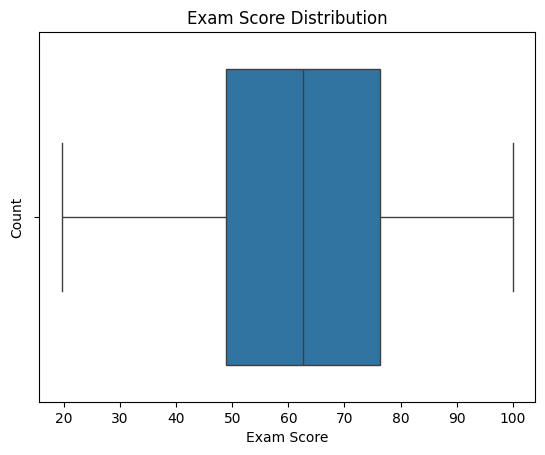

In [ ]:
# Test scores

sns.boxplot(x='exam_score', data=df)
plt.title('Exam Score Distribution')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
X = df_dummies.drop('exam_score', axis=1)
y = df_dummies['exam_score']

In [ ]:
y

,exam_score
0,58
1,54
2,90
3,29
4,43
...,...
19995,86
19996,60
19997,64
19998,79


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
m1 = LinearRegression()
m1.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = m1.predict(X_test)
pred = pd.DataFrame(predictions)

In [ ]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# not terrible

Mean Absolute Error (MAE): 8.02
Mean Squared Error (MSE): 99.07
Root Mean Squared Error (RMSE): 9.95
R-squared (R2): 0.72


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale Features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
NN_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
NN_model.compile(tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_squared_error', metrics = ['mae','mse'])

In [ ]:
NN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,569 (6.13 KB)

 Trainable params: 1,569 (6.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
NN_model.fit(X_train_scaled,y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3049.4690 - mae: 49.8229 - mse: 3049.4690 - val_loss: 144.9185 - val_mae: 9.6005 - val_mse: 144.9185
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 131.6991 - mae: 9.1995 - mse: 131.6991 - val_loss: 131.0711 - val_mae: 9.1353 - val_mse: 131.0711
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 121.4620 - mae: 8.7940 - mse: 121.4620 - val_loss: 123.8335 - val_mae: 8.8910 - val_mse: 123.8335
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 113.0860 - mae: 8.5727 - mse: 113.0860 - val_loss: 119.2088 - val_mae: 8.7416 - val_mse: 119.2088
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 108.1781 - mae: 8.3417 - mse: 108.1781 - val_loss: 117.3813 - val_mae: 8.6730 - val_mse: 117.3813
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 107.4593 - mae: 8.3089 - mse: 107.4593 - val_loss: 116.2291 - val_mae: 8.6180 - val_mse: 116.2291
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s

In [ ]:
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_rmse = np.sqrt(nn_mse)
nn_r2 = r2_score(y_test, nn_predictions)

print(f'Neural Network Mean Absolute Error (MAE): {nn_mae:.2f}')
print(f'Neural Network Mean Squared Error (MSE): {nn_mse:.2f}')
print(f'Neural Network Root Mean Squared Error (RMSE): {nn_rmse:.2f}')
print(f'Neural Network R-squared (R2): {nn_r2:.2f}')

Neural Network Mean Absolute Error (MAE): 8.40
Neural Network Mean Squared Error (MSE): 109.19
Neural Network Root Mean Squared Error (RMSE): 10.45
Neural Network R-squared (R2): 0.70


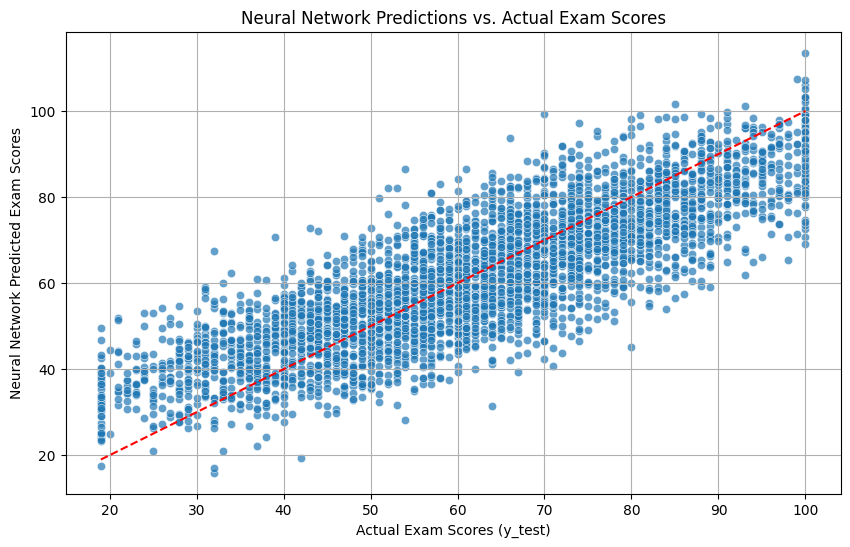

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=nn_predictions.flatten(), alpha=0.7)
plt.title('Neural Network Predictions vs. Actual Exam Scores')
plt.xlabel('Actual Exam Scores (y_test)')
plt.ylabel('Neural Network Predicted Exam Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') # Ideal prediction line
plt.grid(True)
plt.show()

In [ ]:
nn_model1= tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)])

nn_model1.compile(tf.keras.optimizers.RMSprop(learning_rate = 0.001) , loss = 'mean_squared_error', metrics = ['mae','mse'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
nn_model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 32)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,569 (6.13 KB)

 Trainable params: 1,569 (6.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
nn_model1.fit(X_train_scaled,y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3149.6162 - mae: 51.6456 - mse: 3149.6162 - val_loss: 146.8484 - val_mae: 9.7245 - val_mse: 146.8484
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 207.1620 - mae: 11.5043 - mse: 207.1620 - val_loss: 126.9790 - val_mae: 9.0520 - val_mse: 126.9790
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 185.9616 - mae: 10.9178 - mse: 185.9616 - val_loss: 122.0972 - val_mae: 8.8905 - val_mse: 122.0972
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 171.2869 - mae: 10.4048 - mse: 171.2869 - val_loss: 116.7745 - val_mae: 8.7090 - val_mse: 116.7745
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 168.1049 - mae: 10.2500 - mse: 168.1049 - val_loss: 114.6928 - val_mae: 8.6464 - val_mse: 114.6928
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 156.9400 - mae: 9.9757 - mse: 156.9400 - val_loss: 113.1022 - val_mae: 8.5981 - val_mse: 113.1022
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Neural Netword does not seem to outperform linear regression
# Maybe a Forest Method might do better, XG Boost or Random Forest

In [ ]:
import xgboost as xgb

In [ ]:
XGB_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

In [ ]:
XGB_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
XGB_model.score(X_test, y_test) # R squared

0.7196259498596191

In [ ]:
xgb_predictions = XGB_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f'XGBoost Mean Absolute Error (MAE): {xgb_mae:.2f}')
print(f'XGBoost Mean Squared Error (MSE): {xgb_mse:.2f}')
print(f'XGBoost Root Mean Squared Error (RMSE): {xgb_rmse:.2f}')
print(f'XGBoost R-squared (R2): {xgb_r2:.2f}')

XGBoost Mean Absolute Error (MAE): 8.11
XGBoost Mean Squared Error (MSE): 100.58
XGBoost Root Mean Squared Error (RMSE): 10.03
XGBoost R-squared (R2): 0.72


In [ ]:
# Linear Regression still performes better than the two methods before

In [ ]:
nn_predictions = NN_model.predict(X_test_scaled)
nn_predictions[:5]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 39.050903],
       [ 68.78245 ],
       [ 53.939503],
       [106.11189 ],
       [ 83.427124]], dtype=float32)

In [ ]:
ensemble_predictions = (predictions + xgb_predictions + nn_predictions.flatten()) / 3

In [ ]:
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_r2 = r2_score(y_test, ensemble_predictions)

print(f'Ensemble Mean Absolute Error (MAE): {ensemble_mae:.2f}')
print(f'Ensemble Mean Squared Error (MSE): {ensemble_mse:.2f}')
print(f'Ensemble Root Mean Squared Error (RMSE): {ensemble_rmse:.2f}')
print(f'Ensemble R-squared (R2): {ensemble_r2:.2f}')

Ensemble Mean Absolute Error (MAE): 8.07
Ensemble Mean Squared Error (MSE): 100.06
Ensemble Root Mean Squared Error (RMSE): 10.00
Ensemble R-squared (R2): 0.72


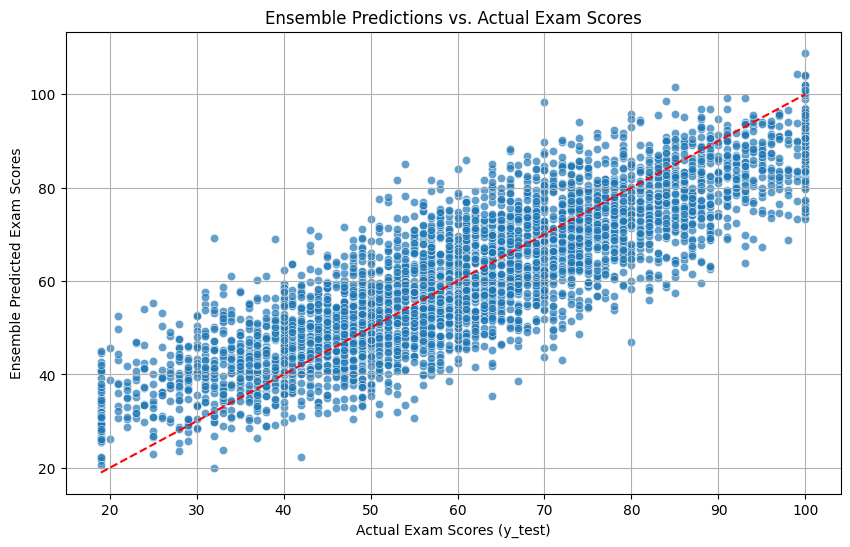

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=ensemble_predictions, alpha=0.7)
plt.title('Ensemble Predictions vs. Actual Exam Scores')
plt.xlabel('Actual Exam Scores (y_test)')
plt.ylabel('Ensemble Predicted Exam Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') # Ideal prediction line
plt.grid(True)
plt.show()

In [ ]:
# It seems that the fancy stuff doesn't perform better than all good linear regression
# LR beats NN, XGBboos and Ensemble of the tree of them
# It does better on most metrics
# Linear Regression my king
# It most likely works this way as the relation even in high dimensions seems to be linear, or I suspect is is linear